In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\Usuario\\Desktop\\DataSet\\6ps7gtp2wg-1\\FRUIT-16K\\F_Banana", label_mode=None, image_size=(224, 224), batch_size=50)

Found 1000 files belonging to 1 classes.


In [7]:
dataset

<_PrefetchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
directorio_principal = 'C:\\Users\\Usuario\\Desktop\\DataSet\\6ps7gtp2wg-1\\FRUIT-16K'
sub_directorio = ['F_Banana','F_lemon','F_Lulo','F_Mango','F_Orange','F_Strawberry','F_Tamarillo','F_Tomato','S_Banana','S_Lemon','S_Lulo','S_Mango','S_Orange','S_Strawberry','S_Tamarillo','S_Tomato']

In [36]:
def mostrar_imagenes(sub_directorio = sub_directorio):
    fig = plt.figure(figsize=(15, 10))
    for i in range(len(sub_directorio)):
        lista_imagenes = os.listdir(os.path.join(directorio_principal, sub_directorio[i]))
        imagen_path = os.path.join(directorio_principal, sub_directorio[i], lista_imagenes[i])
        imagen = cv2.imread(imagen_path)
        imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
        ax = fig.add_subplot(2, len(sub_directorio)//2, i + 1)
        ax.imshow(imagen_rgb)
        ax.set_title(sub_directorio[i])  
        ax.axis('off') 
    plt.show()

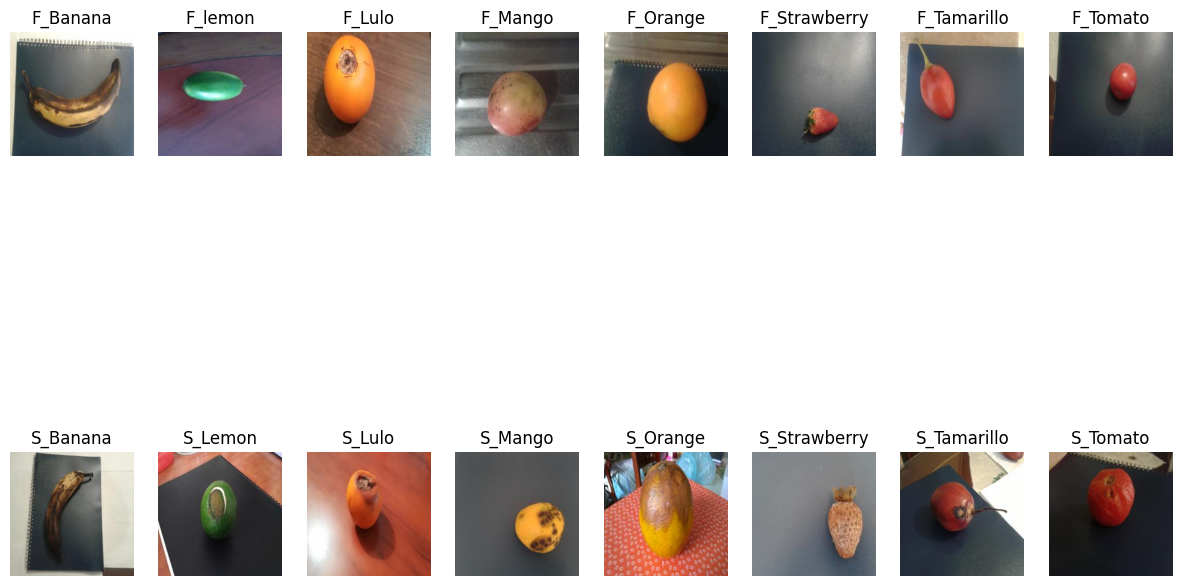

In [37]:
#mostrar_imagenes("S_Banana")
mostrar_imagenes()

In [38]:
def mostrar_histogramas_por_carpeta(directorio_principal):
    carpetas = [nombre for nombre in os.listdir(directorio_principal) if os.path.isdir(os.path.join(directorio_principal, nombre))]
    fig, axs = plt.subplots(len(carpetas), 1, figsize=(10, 5 * len(carpetas)))
    for i, carpeta in enumerate(carpetas):
        valores_pixeles = []
        archivos = os.listdir(os.path.join(directorio_principal, carpeta))
        for archivo in archivos:
            ruta_imagen = os.path.join(directorio_principal, carpeta, archivo)
            imagen = cv2.imread(ruta_imagen)
            valores_pixeles.extend(imagen.flatten())
        media = np.mean(valores_pixeles)
        std_dev = np.std(valores_pixeles)
        min_val = np.min(valores_pixeles)
        max_val = np.max(valores_pixeles)
        axs[i].hist(valores_pixeles, bins=256, range=(0, 256), density=True, alpha=0.75, color='blue')
        axs[i].set_title(f'Histograma - Carpeta: {carpeta}')
        axs[i].set_xlabel('Valor de píxel')
        axs[i].set_ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
